ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Make plots look cleaner
sns.set()

In [2]:
# Load Dataset
bm = fetch_ucirepo(id=222) 

# Combine features and targets into one dataframe for EDA
df = pd.concat([bm.data.features, bm.data.targets], axis=1)

# Display first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### Check Missing Values

In [3]:
# Check all values
print(df.isna())

         age    job  marital  education  default  balance  housing   loan  \
0      False  False    False      False    False    False    False  False   
1      False  False    False      False    False    False    False  False   
2      False  False    False      False    False    False    False  False   
3      False  False    False       True    False    False    False  False   
4      False   True    False       True    False    False    False  False   
...      ...    ...      ...        ...      ...      ...      ...    ...   
45206  False  False    False      False    False    False    False  False   
45207  False  False    False      False    False    False    False  False   
45208  False  False    False      False    False    False    False  False   
45209  False  False    False      False    False    False    False  False   
45210  False  False    False      False    False    False    False  False   

       contact  day_of_week  month  duration  campaign  pdays  previous  \


In [4]:
print(df.isna().sum())

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64


### Check duplicate rows

In [5]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [6]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (45211, 17) 

number of rows:  45211
number of columns:  17


### Data type of columns

In [7]:
# viewing the data types of columns
print(df.dtypes)

age            int64
job              str
marital          str
education        str
default          str
balance        int64
housing          str
loan             str
contact          str
day_of_week    int64
month            str
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome         str
y                str
dtype: object


In [8]:
df['balance'] = pd.to_numeric(df['balance'])
df['duration'] = pd.to_numeric(df['duration'])

### Descriptive summary Statistics

In [9]:
# Statistical summary
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,44923,45211,43354,45211,45211.000000,45211,45211,32191,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,8252,45211
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,4901,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


### Univariate Analysis

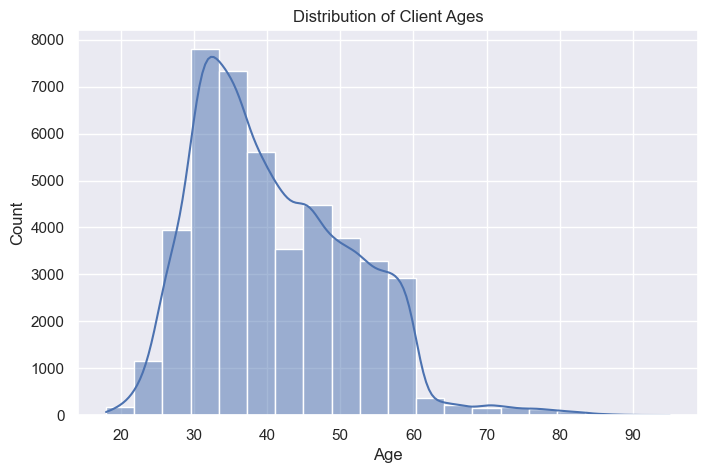

In [10]:
# Distribution of Client Ages
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Client Ages")
plt.xlabel("Age")
plt.show()

Shows how client ages are distributed

### Distribution of Balance

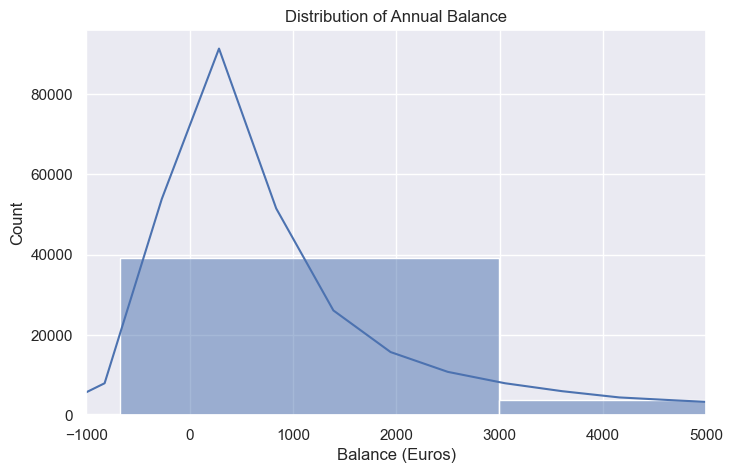

In [11]:
# Distribution of Balance
plt.figure(figsize=(8,5))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title("Distribution of Annual Balance")
plt.xlabel("Balance (Euros)")
plt.xlim(-1000, 5000) # limiting x-axis due to extreme outliers
plt.show()

## Bivariate Analysis

### Subscription Status

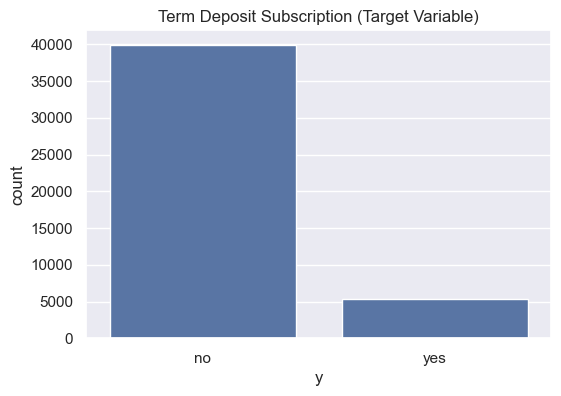

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)
plt.title("Term Deposit Subscription (Target Variable)")
plt.show()

### Job Type vs. Balance

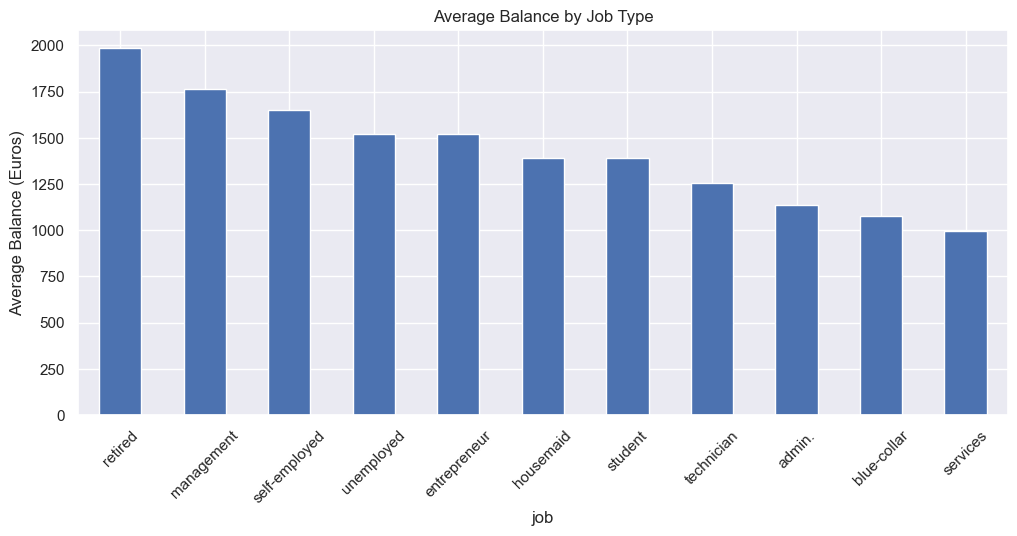

job
retired          1984.215106
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
Name: balance, dtype: float64

In [13]:
# Calculate average balance per job type
job_balance = df.groupby('job')['balance'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
job_balance.plot(kind='bar')
plt.title("Average Balance by Job Type")
plt.ylabel("Average Balance (Euros)")
plt.xticks(rotation=45)
plt.show()

# Display data
job_balance.head()

### Balance by Education Level

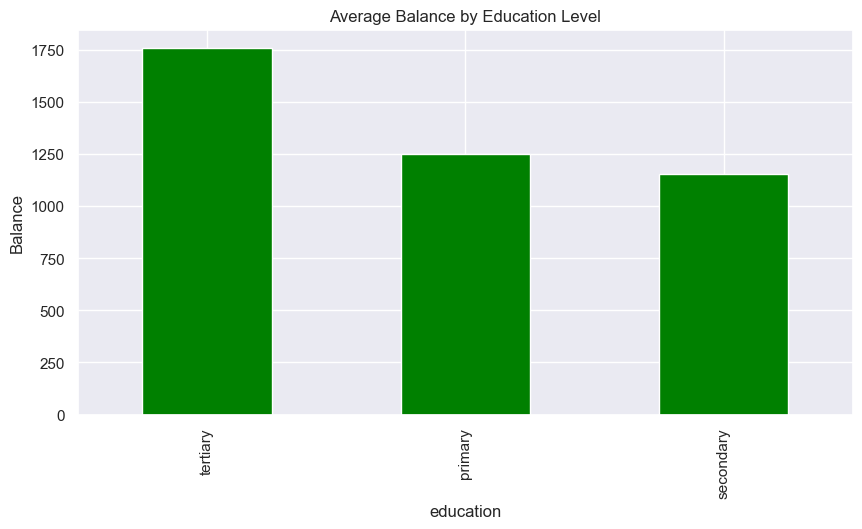

In [14]:
education_balance = df.groupby('education')['balance'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
education_balance.plot(kind='bar', color='green')
plt.title("Average Balance by Education Level")
plt.ylabel("Balance")
plt.show()

### Age vs. Balance Relationship

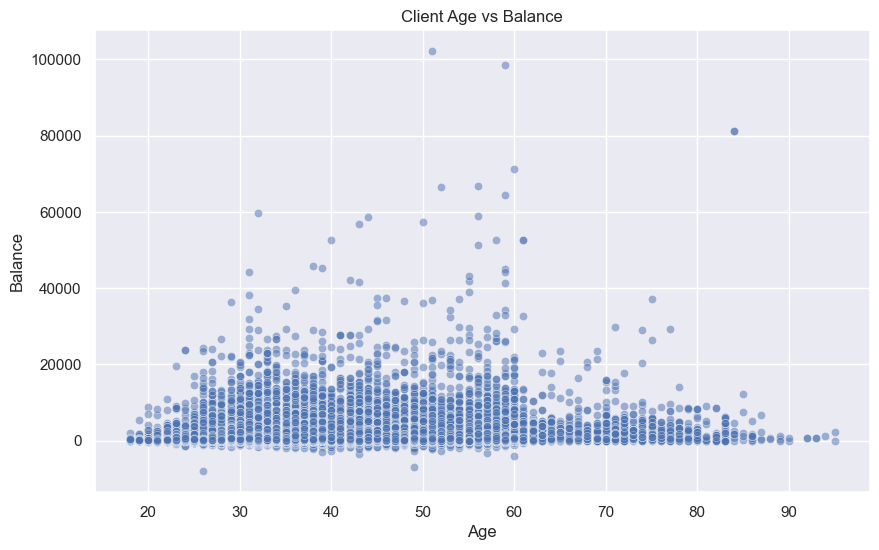

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='balance', data=df, alpha=0.5)
plt.title("Client Age vs Balance")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.show()

### Correlation Matrix

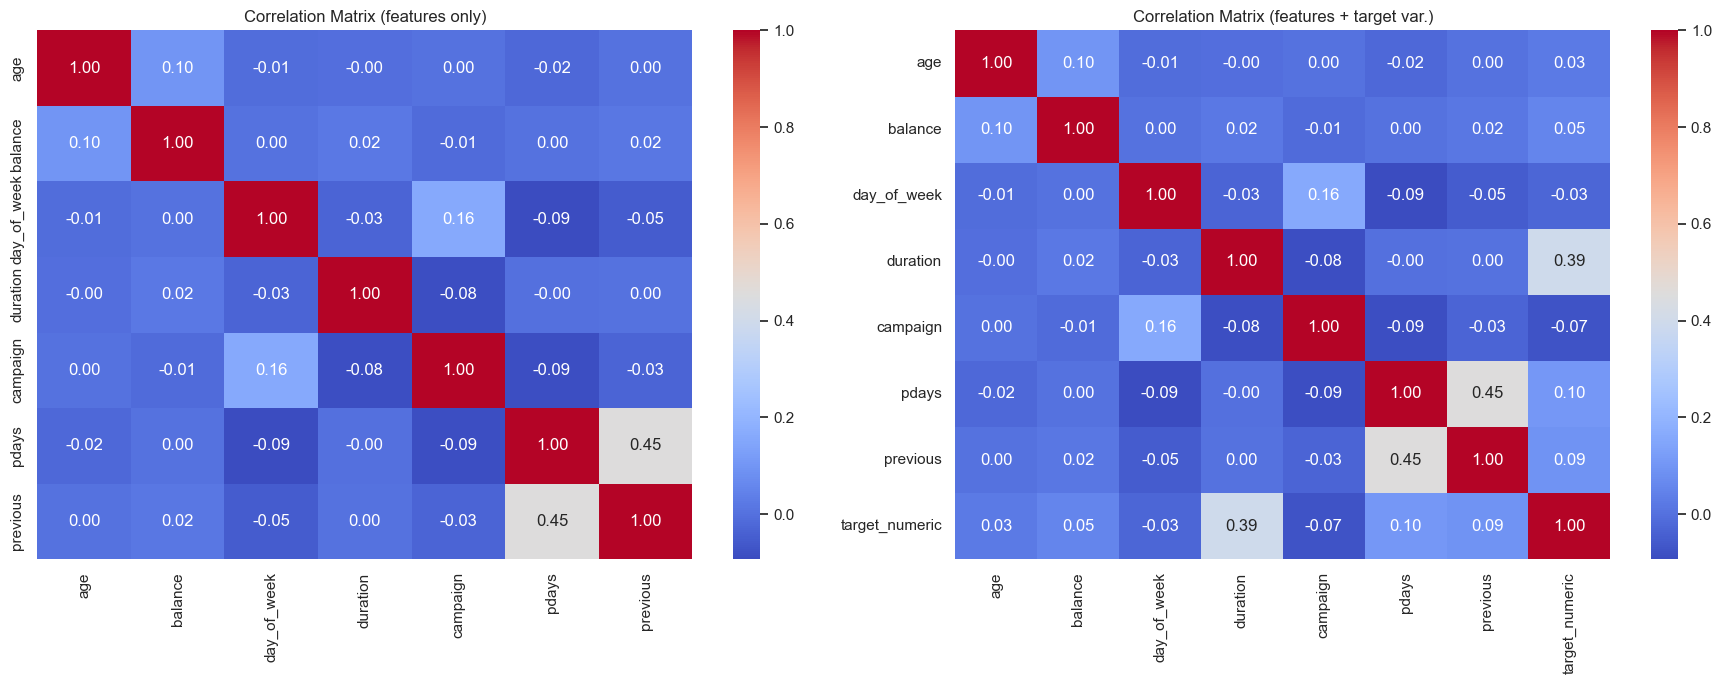

In [ ]:
# numerically represent target variable
df['target_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# features only dataframe
features_only = df.select_dtypes(include=[np.number]).drop(columns=['target_numeric'])

# features + target dataframe
features_and_target = df.select_dtypes(include=[np.number])

# include plots side-by-side by making them subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# plot matrix 1 (features only)
sns.heatmap(features_only.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix (features only)")

# plot matrix 2 (features + target)
sns.heatmap(features_and_target.corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix (features + target var.)")

plt.tight_layout()
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Activity Trend

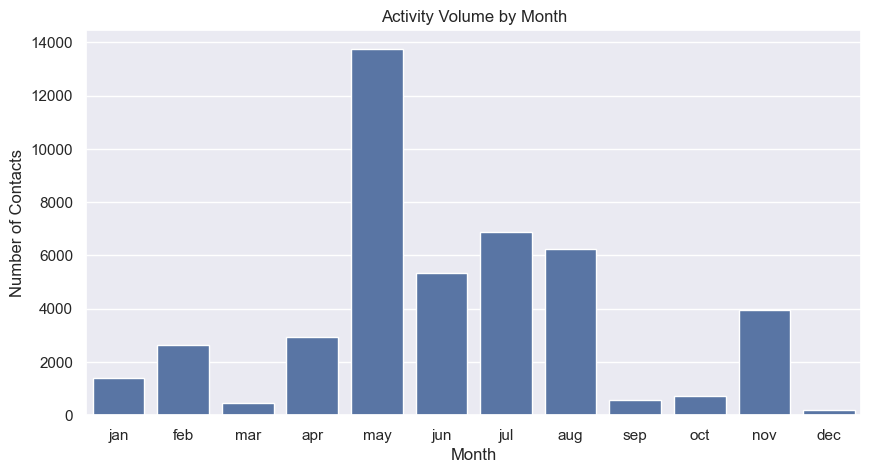

In [ ]:
# the 'month' column is provided as strings
# here we see which months have the most activity

months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(10,5))
sns.countplot(x='month', data=df, order=months)
plt.title("Activity Volume by Month")
plt.xlabel("Month")
plt.ylabel("Number of Contacts")
plt.show()

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.